# Titanic - Machine Learning from Disaster

**KIERAN THAKKAR**   *Python 3.11.6*

#### https://www.kaggle.com/competitions/titanic/overview
The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [86]:
# imports
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [87]:
# import datasets (downloaded from Kaggle)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Look at datasets

In [88]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### Data Dictionary
Variable	Definition	Key
- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex	
- Age	Age in years
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number
- fare	Passenger fare
- cabin	Cabin number	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes
- pclass: A proxy for socio-economic status (SES): 1st = Upper, 2nd = Middle, 3rd = Lower
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- sibsp: The dataset defines family relations in this way Sibling = brother, sister, stepbrother, stepsister | Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way Parent = mother, father | Child = daughter, son, stepdaughter, stepson | Some children travelled only with a nanny, therefore parch=0 for them.

## Preliminary visualisations

<Axes: >

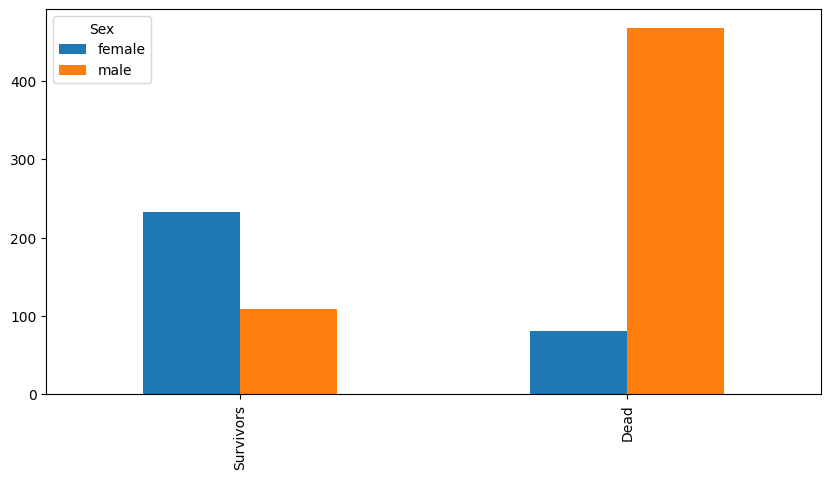

In [92]:
# Sex
subject = "Sex"
survivors = train[train['Survived']==1][subject].value_counts()
dead = train[train['Survived']==0][subject].value_counts()
df = pd.DataFrame([survivors,dead])
df.index = ['Survivors','Dead']
df.plot(kind='bar', figsize=(10,5))

<Axes: >

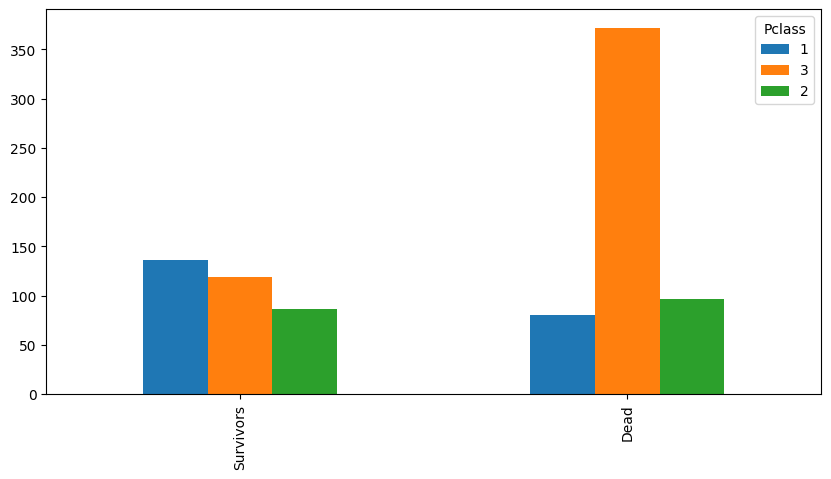

In [93]:
# Ticket Class
subject = "Pclass"
survivors = train[train['Survived']==1][subject].value_counts()
dead = train[train['Survived']==0][subject].value_counts()
df = pd.DataFrame([survivors,dead])
df.index = ['Survivors','Dead']
df.plot(kind='bar', figsize=(10,5))

<Axes: >

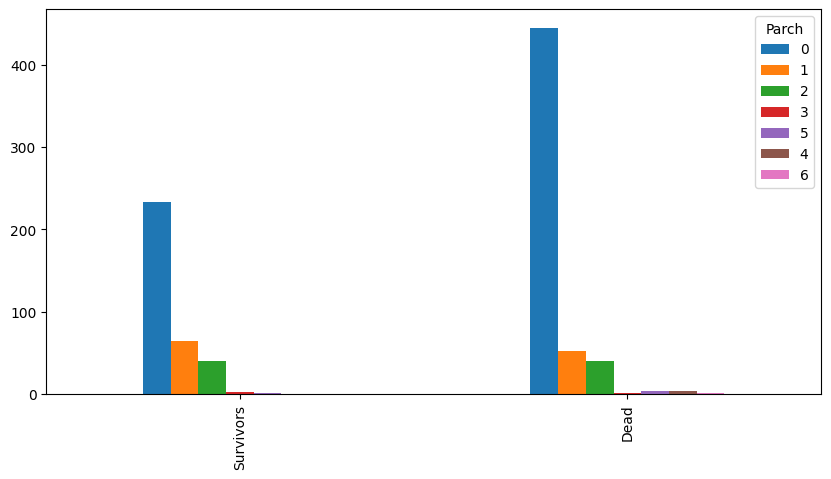

In [94]:
# Relatives -- Parents or Children?
subject = "Parch"
survivors = train[train['Survived']==1][subject].value_counts()
dead = train[train['Survived']==0][subject].value_counts()
df = pd.DataFrame([survivors,dead])
df.index = ['Survivors','Dead']
df.plot(kind='bar', figsize=(10,5))

<Axes: >

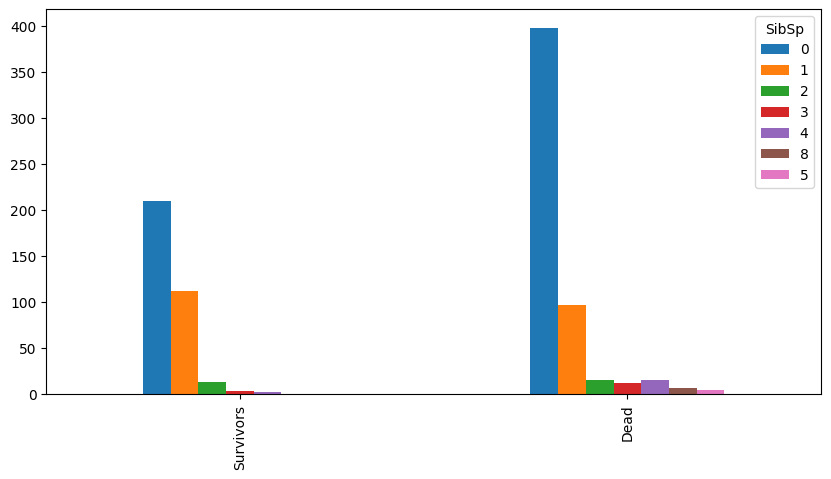

In [95]:
# Siblings or Spouse?
subject = "SibSp"
survivors = train[train['Survived']==1][subject].value_counts()
dead = train[train['Survived']==0][subject].value_counts()
df = pd.DataFrame([survivors,dead])
df.index = ['Survivors','Dead']
df.plot(kind="bar", figsize=(10,5))

## Null Values
As we can see from the .info() codes, there is a lot of missing data on both the training and test datasets.

This is for age and cabin data.
So, lets fix that.

## Age

### Remove NaN age values
We need to fill in age blanks with median values. But an adult male should be different median height to a little girl, right? To achieve this I will group the people into bins based on their title. This is found in their name data.

In [96]:
# Admitedly, these lines of code have been taken from StackOverflow.
combined = [train, test]

for dataset in combined:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# These lines have created a "title" column to better group the data w/o age bins. Those will come later.

In [97]:
# ML can only use numeric columns
# I am going to convert each title into a bin that I think best suits it.

title_bins = title_mapping = {"Mr": 0, "Rev": 0, "Col": 0, "Major": 0, "Capt": 0, "Sir": 0,
                              "Mrs": 1, "Countess": 1, "Ms": 1, "Lady": 1,
                              "Master": 2, "Miss": 2,
                              "Dr": 3,  "Mlle": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3
                              }

for dataset in combined:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [98]:
train.Age.fillna(train.groupby("Title").Age.transform("median"), inplace=True)
test.Age.fillna(test.groupby("Title").Age.transform("median"), inplace=True)

In doing this, I no longer need the "Name" column.

### Group ages into bins
My bins are adolescent (0), young adult (1), grown (2), middle-aged (3), and elderly (4)

In [99]:
for i in combined:
    i.loc[ i.Age <= 18, 'Age'] = 0
    i.loc[(i.Age > 18) & (i.Age <= 25), 'Age'] = 1
    i.loc[(i.Age > 25) & (i.Age <= 40), 'Age'] = 2
    i.loc[(i.Age > 40) & (i.Age <= 65), 'Age'] = 3
    i.loc[ i.Age > 65, 'Age'] = 4

## Sex

Data is either male or female, we want that to be binary classieifed (1 or 0)

In [101]:
sex = {"male": 0, "female": 1}
for x in combined:
    x.Sex = x.Sex.map(sex)

Remaining data I care about is numeric. Lets begin modelling.